## Задание 1
Ответьте на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью? Для ответа выполните следующие шаги:

* Постройте точечный график.
* Рассчитайте коэффициенты корреляции Пирсона и Спирмена.
* Постройте модель линейной регрессии.
* Рассчитайте коэффициент детерминации.
* Выведите график остатков.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('files/water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


### График

<Axes: xlabel='mortality', ylabel='hardness'>

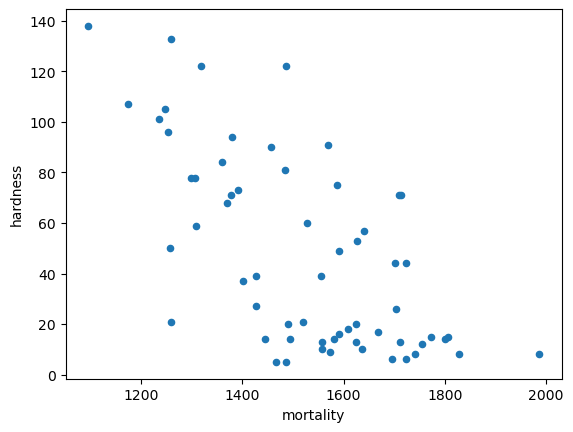

In [3]:
# визуализируем взаимосвязь между жёсткостью воды и средней годовой смертностью
df.plot(kind='scatter', x='mortality', y='hardness')

### Корреляция

In [4]:
# считаем коэф. корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [5]:
# считаем коэф. корреляции Спирмана
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


### Регрессия

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
X = df['hardness'].values.reshape(-1, 1)
y = df['mortality']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
X_train.shape

(42, 1)

In [10]:
X_test.shape

(19, 1)

In [11]:
y_train.shape

(42,)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [13]:
model.coef_

array([-3.13167087])

In [14]:
model.intercept_

1668.9722977277095

In [15]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [16]:
y_test

0     1247
5     1558
46    1495
31    1702
13    1307
55    1625
34    1259
49    1587
12    1519
40    1696
33    1309
59    1485
16    1555
3     1800
53    1709
17    1428
8     1637
6     1807
41    1236
Name: mortality, dtype: int64

### Детерминации

In [17]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

### Остатки

Text(0, 0.5, 'Остатки')

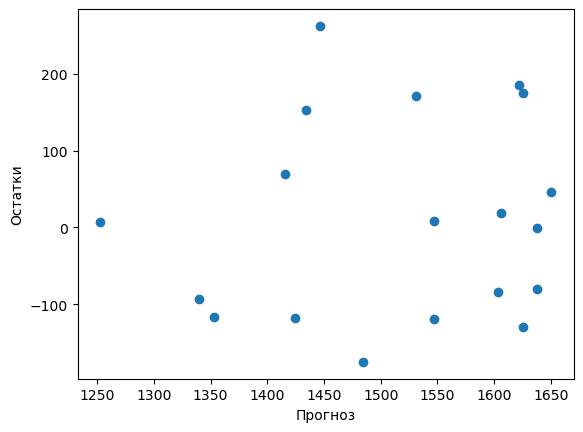

In [18]:
# посмотрим на остатки
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

## Задание 2
Ответьте на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности? Для ответ выполните следующие шаги:

Разделите данные на 2 группы.
Повторите аналогичные шаги из пункта 1 для каждой группы по отдельности.

### South

In [19]:
south_data = df[['mortality', 'hardness']][df.location == 'South']

<Axes: xlabel='mortality', ylabel='hardness'>

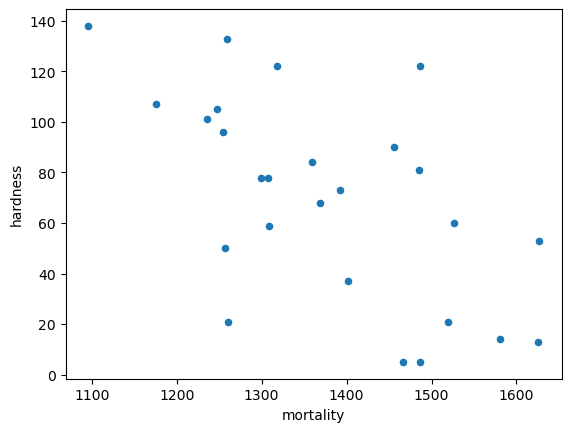

In [20]:
# визуализируем взаимосвязь между жёсткостью воды и средней годовой смертностью
south_data.plot(kind='scatter', x='mortality', y='hardness')

In [21]:
# считаем коэф. корреляции Пирсона
south_data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [22]:
# считаем коэф. корреляции Спирмана
south_data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [23]:
X = south_data['hardness'].values.reshape(-1, 1)
y = south_data['mortality']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
model.coef_

array([-3.51342921])

In [27]:
model.intercept_

1640.2204603423374

In [28]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [29]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

-2.5519223012352077

Text(0, 0.5, 'Остатки')

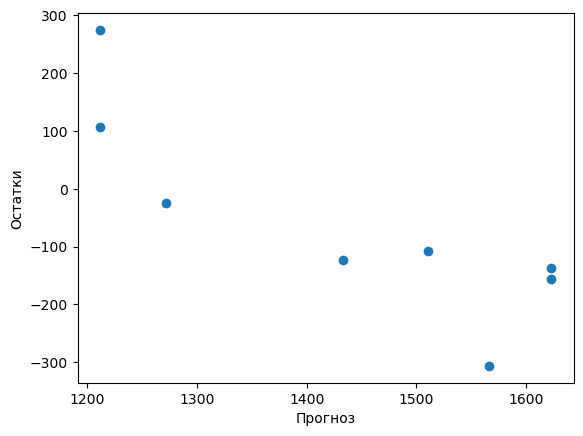

In [30]:
# посмотрим на остатки
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

### North

<Axes: xlabel='mortality', ylabel='hardness'>

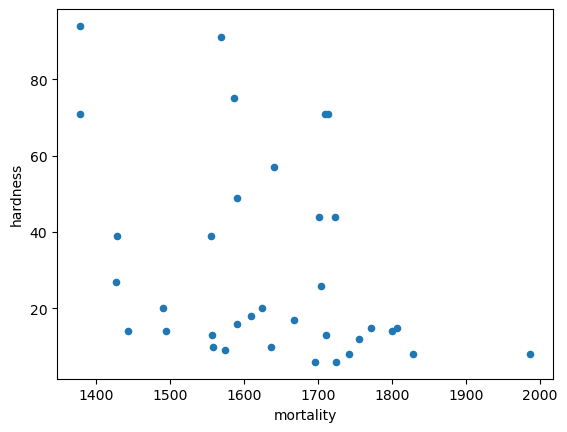

In [31]:
north_data = df[['mortality', 'hardness']][df.location == 'North']
north_data.plot(kind='scatter', x='mortality', y='hardness')

In [32]:
# коэф. корреляции Пирсона
north_data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [33]:
# коэф. корреляции Спирмана
north_data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [34]:
X = north_data['hardness'].values.reshape(-1, 1)
y = north_data['mortality']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
model.coef_

array([-1.97686226])

In [38]:
model.intercept_

1688.150229031281

In [39]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [40]:
model.score(X_test, y_test)

0.018885304285745863

Text(0, 0.5, 'Остатки')

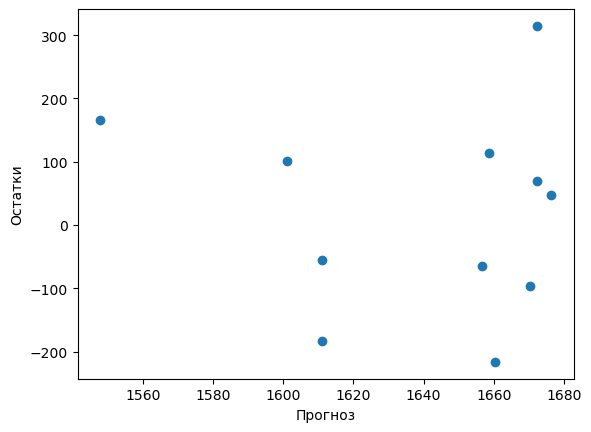

In [41]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')